In [1]:
import math

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pyeit.mesh.plot_mesh import plot_mesh

from pyEIT_image_wrapper import geometry_to_img_wrot, groundtruth_IMG_based, pol2cart

In [2]:
save_img = True

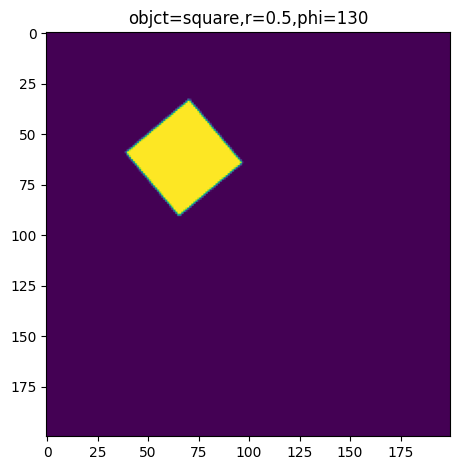

In [3]:
IMG = geometry_to_img_wrot(objct="square", r=0.5, phi=130, d=0.2)
plt.title("objct=square,r=0.5,phi=130")
plt.imshow(IMG)
if save_img:
    plt.savefig("images/geometry_to_img_1.png", dpi=300)
plt.tight_layout()
plt.show()

1.0
10.0


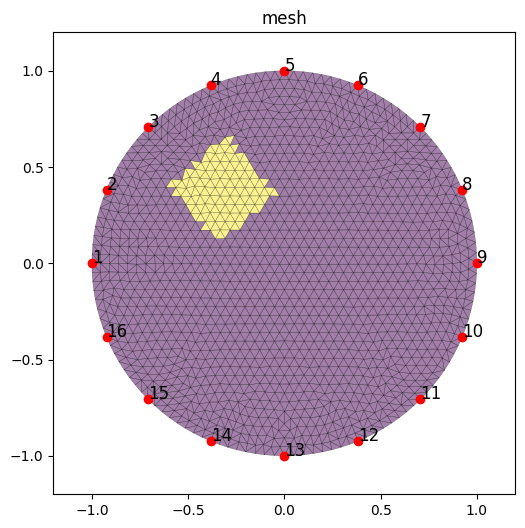

In [4]:
n_el = 16
el_pos = np.arange(n_el)
mesh_obj = groundtruth_IMG_based(IMG, n_el, perm_empty_gnd=1, perm_obj=10, h0=0.05)
plot_mesh(mesh_obj)
if save_img:
    plt.savefig("images/groundtruth_IMG_based_1.png", dpi=300)
print(np.min(mesh_obj.perm))
print(np.max(mesh_obj.perm))

# Demo picture

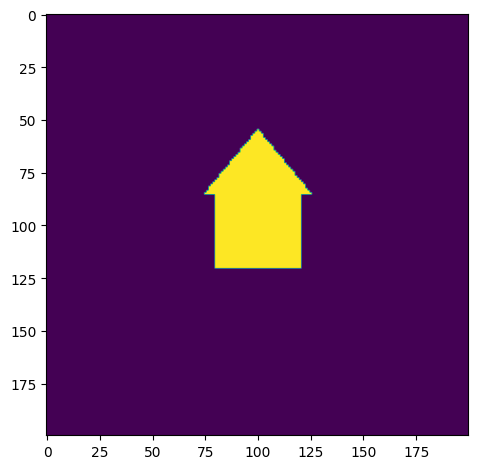

In [5]:
d = 0.2

IMG = np.zeros((200, 200))
center_coordinates = pol2cart(0, 0)  # *0 für die Rotation
start_point = (
    int(center_coordinates[0] - int(d * 100)),
    center_coordinates[1] - int(d * 100),
)
end_point = (center_coordinates[0] + int(d * 100), center_coordinates[1] + int(d * 100))
color = (1, 0, 0)
thickness = -1
IMG = cv2.rectangle(IMG, start_point, end_point, color, thickness)
d = 0.25
center_coordinates = pol2cart(0, 0)
pt1 = (int(center_coordinates[0]), int(center_coordinates[1] - int((d) * 100) - 20))
pt2 = (
    int(center_coordinates[0] + int((d) * 100)),
    int(center_coordinates[1]) + int((d) * 100) - 40,
)
pt3 = (
    int(center_coordinates[0] - int((d) * 100)),
    int(center_coordinates[1]) + int((d) * 100) - 40,
)
tri_edges = np.array([pt1, pt2, pt3])
IMG = cv2.drawContours(IMG, [tri_edges], 0, (1, 0, 0), -1)
plt.imshow(IMG)
if save_img:
    plt.savefig("images/house_img.png", dpi=300)
plt.tight_layout()
plt.show()

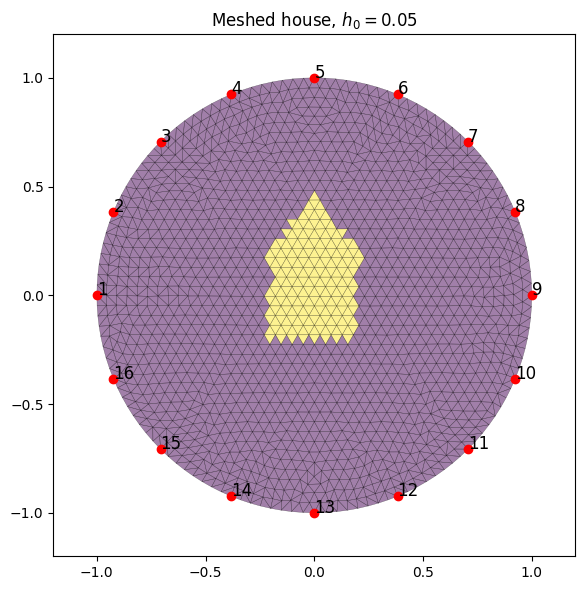

In [6]:
n_el = 16
el_pos = np.arange(n_el)
mesh_obj = groundtruth_IMG_based(IMG, n_el, perm_empty_gnd=1, perm_obj=10, h0=0.05)

plot_mesh(mesh_obj)
plt.title("Meshed house, $h_0 = 0.05$")
if save_img:
    plt.savefig("images/meshed_house_based_05.png", dpi=300)
plt.tight_layout()
plt.show()